# Flow past objects
## Ideal fluid - d'Alembert's paradox
In ideal fluid there are no forces acting on a body subjected to steady, uniform flow. This is known as d'Alembert's paradox. It is called a paradox, since it obviously contraticts reality, as from experiment we know that objects in a steady flow will experience hydrodynamic forces. Consider a cylinder in steady, uniform cross-flow.
<div>
<img src="Figures/Cross_flow.PNG" width="600">
</div>
The figure illustrates a circular cylinder of diameter $D=2R$, subjected to the steady, uniform flow $U$ in the positive $x$-direction. The velocity potential is composed of a uniform flow potential $\phi_1=Ux$, and a dipole potential with axis in the negative $x$-direction $\phi_2=\frac{m}{2\pi}\frac{x}{r^2}$. From the definition of variables in the above figure, we see that $x=-r\cos(\theta)$. By requiring a stagnation point at the sylinder surface, $r=R$ and $\theta=0$, the dipole strength $m$ is found to be $m=2\pi UR$ The total velocity potential in polar coordinates then becomes
$$\phi=-Ur\cos\theta-UR^2\frac{\cos\theta}{r}$$
When we know the velocity potential, we can compute the hydrodynamic pressure from Bernoulli's equation.
$$p_0+\frac{1}{2}\rho U^2=p+\frac{1}{2}\rho |\nabla\phi|^2$$
On the surface of the cylinder, we have that $u_r=\frac{\partial\phi}{\partial r}=0$, i.e. there is no flow through the boundary. Further, the tangential velocity on the cylinder surface is $u_{\theta}=\frac{1}{R}\frac{\partial\phi}{\partial \theta}=2U\sin\theta$. Hence, we have $\nabla\phi=[\frac{\partial\phi}{\partial r}, \frac{1}{R}\frac{\partial\phi}{\partial\theta}]=[0, 2U\sin\theta]$ on the cylinder surface.
The pressure on the cylinder surface is then found as
$$p=p_0+\frac{1}{2}\rho U^2-2\rho U^2\sin^2(\theta)$$
The pressure coefficient is defined as
$$C_p=\frac{p-p_0}{\frac{1}{2}\rho U^2}=1-4\sin^2\theta$$
Let us have a look at the pressure coefficient on the cylinder surface.

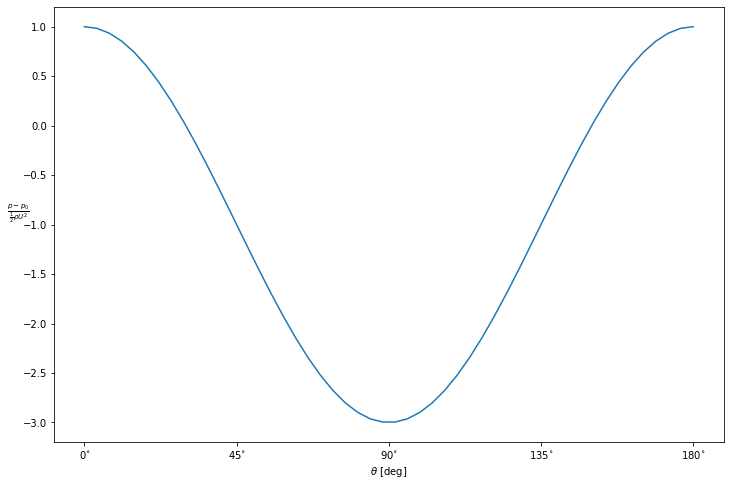

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi)
cp = 1.0 - 4.0*np.sin(theta)**2

fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.plot(theta*180/np.pi, cp)
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_xticks([0, 45, 90, 135, 180])
labels = [str(item)+'$^{\circ}$' for item in ax.get_xticks()]
ax.set_xticklabels(labels)
ax.set_ylabel(r'$\frac{p-p_0}{\frac{1}{2}\rho U^2}$', rotation=0)
plt.rcParams.update({'font.size': 16})

We see from the above figure that the pressure distribution is symmetric about $x$- and $y$-axis, which means there is no net force acting on the cylinder in ideal fluid.

# Wave-loads on large volume structures
Consider a vertical bottom mounted and surface piercing circular cylinder. When the incident wave lengths are of comparable length as the cylinder diameter, or smaller, diffraction effects matter. MacCamy and Fuchs solved the linear boundary value problem of a vertical cylinder in waves, governed by the Laplace equation and linear free surface condition.
By expressing the BVP in cylinder coordinates, the partial differential equation is separable, and three ODE's are obtained. The radial depence of the problem is described by the Bessel's differential equation, which solution are Bessel functions of the first and second kind. Bessel functions are special functions used to describe the radial dependency of the amplitude of "ring"-waves. These are special mathematical functions that can be found in the *scipy.special* library in python. Let us have a look. 

(-1, 1)

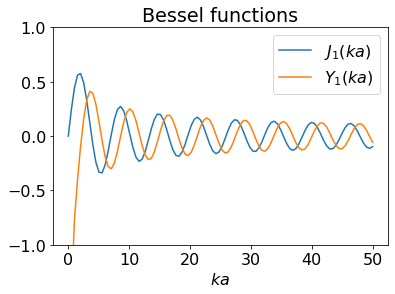

In [11]:
from scipy.special import j1, y1,  # Import Bessel functions of the first and second kind, of order 1

ka = np.linspace(0.0001, 50., 100)

fig2=plt.figure()
ax = fig2.add_subplot()
ax.plot(ka, j1(ka), label=r'$J_1(ka)$')
ax.plot(ka, y1(ka), label=r'$Y_1(ka)$')
ax.set_xlabel(r'$ka$')
ax.legend()
ax.set_title('Bessel functions')
ax.set_ylim(ymin=-1, ymax=1)


According to MacCamy and Fuchs theory, the total wave force on a vertical cylinder is given by the expression
$$F=\frac{2\rho g H}{k^2}\tanh(kh)A(ka)\cos(\omega t - \alpha)$$
where $H$ is wave height, $k$ is wave number, $a$ is cylinder radius, $h$ is water depth (height of cylinder), $\omega$ is wave frequency and $\alpha$ is an arbitrary phase angle. Further, the wavenumber-dependent constant $A(ka)$ is given by
$$A(ka)=\frac{1}{\sqrt{(J'_1(ka))^2+(Y'_1(ka))^2}}$$
where primes denote the first order derivative of the bessel functions. How to compute the wave number at finite water depth for a given wave frequency was shown in the notebook from [Lecture 2](Lecture_2.ipynb). Let us compute the wave excitation force on a pile from MacCamy Fuchs theory.

In [18]:
from scipy.special import jvp, yvp # Import method to compute derivative of Bessel functions of first and second kind. Usage: jvp(v, x, n) where v is order of bessel function, x is the varible (real or complex) and n is order of derivative (default=1)
import airywavelib as airy  # Our own wave library

def ampfunc(ka):
    return 1.0/np.sqrt(jvp(1, ka)**2+yvp(1, ka)**2)

def waveforceamp(waveper, waveamp, diameter, depth):
    
    # Constants
    rho = 1000.    # [kg/m^3]
    gravity = 9.81 # [m/s^2]
    
    H = 2*waveamp
    omg = 2*np.pi/waveper
    k = airy.findWaveNumber(omg)
    ka = 0.5*diameter*k
    
    F = 2*rho*gravity*H/k**2*np.tanh(k*depth)*ampfunc(ka)
    
    return F


D = 4. # [m]
h = 20. # [m]
zetaA = 1. # [m]
T = 2.     # [s]

F = waveforceamp(T, zetaA, D, h)
print("Wave force amplitude: F_A = {:.03} kN".format(F/1000.))

Wave force amplitude: F_A = 68.5 kN
